## Download data  

In [ ]:
!gdown --id 1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6
To: /content/NonLinear_data.npy
100% 5.57k/5.57k [00:00<00:00, 9.58MB/s]


In [ ]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

## Load Data

In [ ]:
data_path = "/content/NonLinear_data.npy"
data = np.load(data_path, allow_pickle=True).item()
X, labels = data["X"], data["labels"]
X, labels = X.astype(np.float32), labels.astype(np.float32)

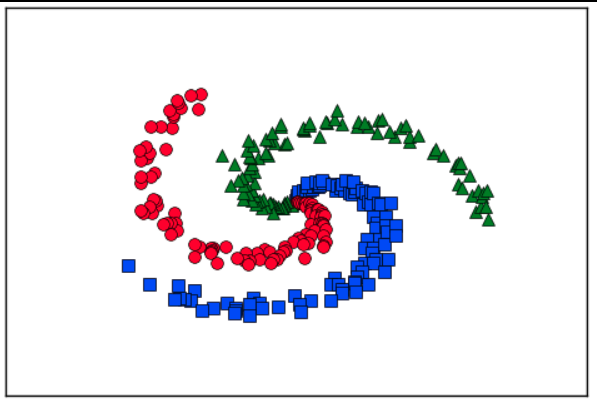

## Sử dụng Tensorflow để  build, compile và train và evaluate model. Kết quả train và evaluation được thể hiện bằng hình ảnh bằng cách sử dụng matplotlib 

### Softmax Regression

In [ ]:
num_class = 3

#
SR_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[2]),
    tf.keras.layers.Dense(units=num_class)
])
SR_model.summary()
#
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt = tf.keras.optimizers.SGD(learning_rate=2)

SR_model.compile(optimizer=opt,loss=loss, metrics=['accuracy'])

#
SR_history = SR_model.fit(X, labels, batch_size=X.shape[0], epochs=500)
# Epoch 250/500
# 1/1 [==============================] - 0s 18ms/step - loss: 0.7412 - accuracy: 0.5267

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 3)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1/1 [==============================] - 4s 4s/step - loss: 1.1927 - accuracy: 0.1233
Epoch 2/500
1/1 [==============================] - 0s 11ms/step - loss: 1.1158 - accuracy: 0.1967
Epoch 3/500
1/1 [==============================] - 0s 18ms/step - loss: 1.0552 - accuracy: 0.2967
Epoch 4/500
1/1 [==============================] - 0s 13ms/step - loss: 1.0068 - accuracy: 0.3633
Epoch 5/500
1/1 [==============================] - 0s 11ms/step - lo

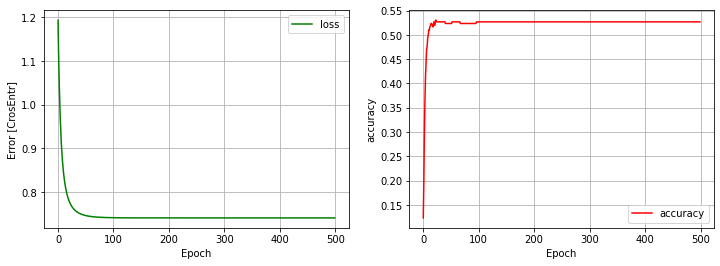

In [ ]:

# plt.plot(SR_history.history['val_loss'], label='val_loss')
# plt.ylim([0, 10])
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(SR_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(SR_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)



In [ ]:
hist = pd.DataFrame(SR_history.history)
hist['epoch'] = SR_history.epoch
hist.tail()

,loss,accuracy,epoch
495,0.74124,0.526667,495
496,0.74124,0.526667,496
497,0.74124,0.526667,497
498,0.74124,0.526667,498
499,0.74124,0.526667,499


In [ ]:
print("Max train acc: ", max(hist['accuracy']))
print("Min train loss: ", min(hist['loss']))

Max train acc:  0.5299999713897705
Min train loss:  0.741239607334137
